# **Data Challenge**

* 1.5 What is the increase in calls for each year? Estimate the increase using a line of best fit.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [32]:
# Reading the data
data = pd.read_csv("boston_311_calls.csv")

data.head()

,case_enquiry_id,open_dt,closed_dt,ontime,case_status,case_title,subject,reason,type,department,location,city_council_district,police_district,neighborhood,ward,precinct,latitude,longitude,source
0,101001873350,2016-08-02 07:25:00,2016-11-01 11:43:30,OVERDUE,Closed,Graffiti Removal,Property Management,Graffiti,Graffiti Removal,PROP,218-230 Congress St Boston MA 02110,1.0,A1,Downtown / Financial District,Ward 3,0306,42.3545,-71.0542,Citizens Connect App
1,101001168147,2014-09-09 13:57:10,2014-09-15 16:38:34,ONTIME,Closed,Schedule Bulk Item Pickup,Public Works Department,Sanitation,Schedule a Bulk Item Pickup SS,PWDx,106 Greenbrier St Dorchester MA 02124,4.0,C11,Dorchester,Ward 17,1703,42.2965,-71.0702,Self Service
2,101000874384,2013-07-07 17:43:55,2013-07-09 14:07:53,ONTIME,Closed,Street Light Outages,Public Works Department,Street Lights,Street Light Outages,PWDx,INTERSECTION of Mountain Ave & Woodrow Ave Do...,4.0,B3,Greater Mattapan,Ward 14,1410,42.2868,-71.0858,Constituent Call
3,101001225622,2014-12-01 09:51:44,2014-12-02 16:37:16,ONTIME,Closed,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx,106 Maplewood St West Roxbury MA 02132,6.0,E5,West Roxbury,Ward 20,2005,42.2731,-71.1507,Constituent Call
4,101003332650,2020-06-29 23:01:00,NaN,OVERDUE,Open,Unsatisfactory Living Conditions,Inspectional Services,Housing,Unsatisfactory Living Conditions,ISD,63 Woodstock Ave Brighton MA 02135,9.0,D14,Allston / Brighton,Ward 21,2108,42.3463,-71.1368,Constituent Call


In [33]:
# Extract 'year' from 'open_dt' 
data['year'] = pd.to_datetime(data['open_dt']).dt.year

In [34]:
# Count the number of calls receivecd each year
counts = data.groupby(data['year']).agg(count=('case_enquiry_id', 'count')).reset_index()

counts

,year,count
0,2011,44344
1,2012,91050
2,2013,111189
3,2014,113018
4,2015,160863
5,2016,168217
6,2017,197903
7,2018,207070
8,2019,204452
9,2020,198450


In [35]:
# calculate the best-fit line
slope, intercept, r_value, p_value, std_err = linregress(counts['year'], counts['count'])
line = slope * counts['year'] + intercept

result = {'slope': [slope],
          'intercept': [intercept], 
          'r_value' : [r_value], 
          'p_value': [p_value], 
          'std_err': [std_err]}

print(pd.DataFrame(result))

          slope     intercept   r_value   p_value      std_err
0  15012.818182 -3.011228e+07  0.937936  0.000007  1755.405956


The increase in calls for each year:  15012.818181818182


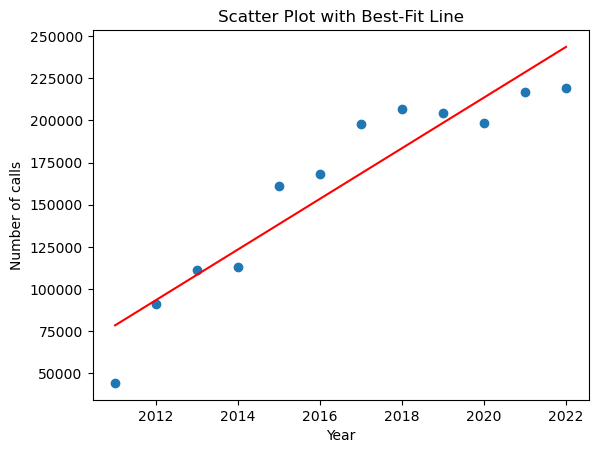

In [36]:
print('The increase in calls for each year: ', slope)

# create a scatter plot
plt.scatter(counts['year'], counts['count'])

# add the best-fit line
plt.plot(counts['year'], line, color='red')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Number of calls')
plt.title('Scatter Plot with Best-Fit Line')

plt.show()